In [1]:
import datetime

In [8]:
d = datetime.date(2016,7,23)
print(d)

2016-07-23


In [10]:
tday = datetime.date.today()
print(tday)

2019-08-15


In [11]:
print(tday.year,tday.day,tday.month)

2019 15 8


In [13]:
print(tday.weekday())

3


In [15]:
print(tday.isoweekday())

4


In [17]:
tdelta = datetime.timedelta(days=7)

In [19]:
tdelta

datetime.timedelta(7)

In [21]:
print(tday+tdelta)

2019-08-22


In [22]:
print(tday-tdelta)

2019-08-08


In [24]:
bday = datetime.date(2016,8,25)

In [25]:
till_bday = bday - tday

In [26]:
print(till_bday)

-1085 days, 0:00:00


In [27]:
t = datetime.time(9,30,45,1000)

In [30]:
print(t)
print(t.hour)
print(t.minute)

09:30:45.001000
9
30


In [31]:
dt = datetime.datetime(2016,9,22,12,34,55,222)
print(dt)

2016-09-22 12:34:55.000222


In [33]:
dt.time()

datetime.time(12, 34, 55, 222)

In [35]:
dt.date()

datetime.date(2016, 9, 22)

In [37]:
tdelta = datetime.timedelta(days=7)
print(dt+tdelta)

2016-09-29 12:34:55.000222


In [38]:
datetime.datetime.today()

datetime.datetime(2019, 8, 15, 15, 46, 50, 673000)

In [39]:
import pytz

In [41]:
dt =  datetime.datetime(2016,4,5,12,34,tzinfo=pytz.UTC)
print(dt)

2016-04-05 12:34:00+00:00


In [42]:
dt_utcnow = datetime.datetime.now(tz=pytz.UTC)
print(dt_utcnow)

2019-08-15 10:24:10.861000+00:00


In [44]:
dt = datetime.datetime.now()
print(dt)

2019-08-15 15:56:48.975000


In [47]:
dt_east = dt.astimezone(pytz.timezone('US/Eastern'))
print(dt_east)

2019-08-15 06:26:48.975000-04:00


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
gold_silver = pd.read_csv("D:/PGDDS/Python/datasets/EDA_Gold_Silver_prices.csv")

In [61]:
gold_silver.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [62]:
np.corrcoef(gold_silver.SilverPrice,gold_silver.GoldPrice)

array([[1.        , 0.95425596],
       [0.95425596, 1.        ]])

In [63]:
gold_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
Month          241 non-null object
SilverPrice    241 non-null float64
GoldPrice      241 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


In [66]:
gold_silver['Month'] = gold_silver['Month'].map(lambda x : "01-"+x)

In [70]:
gold_silver['Month'] = pd.to_datetime(gold_silver['Month'])

In [78]:
year2008 = gold_silver[ gold_silver['Month'].dt.year == 2008]


In [79]:
np.corrcoef(year2008.SilverPrice,year2008.GoldPrice)

array([[1.        , 0.00958376],
       [0.00958376, 1.        ]])

In [81]:
cordata = gold_silver.corr()

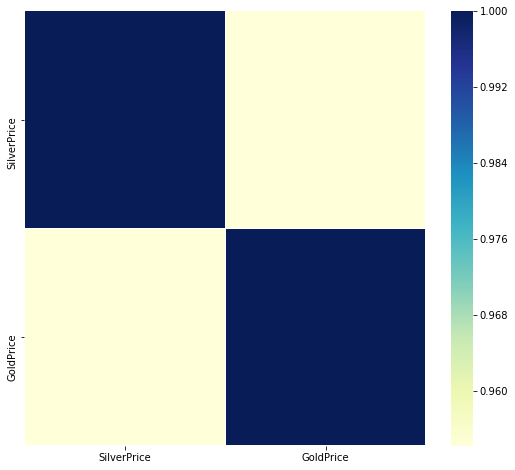

In [82]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cordata, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [83]:
cur = pd.read_csv("D:/PGDDS/Python/datasets/currencies.csv")
cur.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [85]:
cormat = cur.corr()

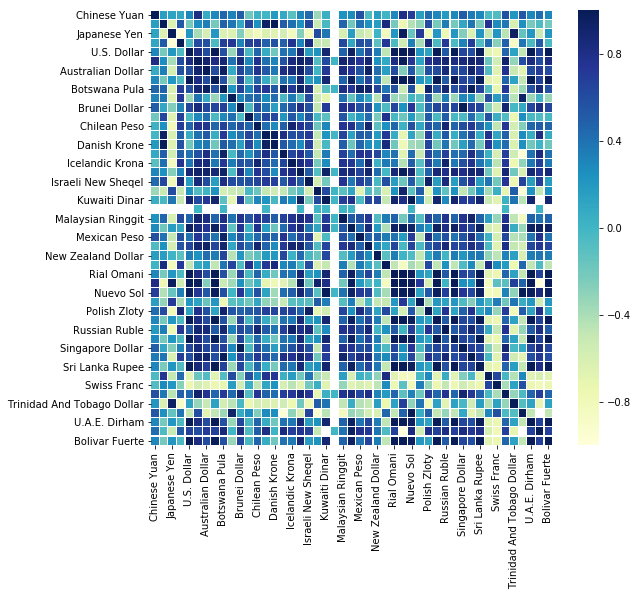

In [87]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cormat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [88]:
cur.corr()

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,8.152155e-01,0.077983,0.291926,4.676926e-01,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,5.851485e-01,0.215925,0.542852,0.291300,4.215738e-01,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,2.599639e-01,0.331588,-0.209926,4.696684e-01,0.383645,...,0.382248,-0.234048,0.756618,0.277528,3.702819e-01,-0.621466,0.257016,-0.210770,-4.788910e-02,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-3.880988e-01,-0.582032,0.209957,-6.270147e-01,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-4.580429e-01,0.952893,-0.147436,0.210296,-5.130655e-01,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,6.131856e-01,0.579213,-0.042220,6.890693e-01,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,4.847034e-01,-0.884769,0.379161,-0.042522,5.128468e-01,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,8.220362e-01,0.607010,0.999999,5.808417e-01,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,4.573712e-01,0.135467,-0.481887,0.999999,6.658314e-01,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000e+00,0.908465,0.822349,8.833664e-01,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,9.175429e-01,-0.321122,0.600139,0.821881,6.013162e-01,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,9.084652e-01,1.000000,0.607349,9.572341e-01,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,7.695417e-01,-0.504815,-0.677335,0.607053,7.108155e-01,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,8.223489e-01,0.607349,1.000000,5.814349e-01,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,4.576994e-01,0.135350,-0.482659,0.999999,6.660374e-01,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,8.833664e-01,0.957234,0.581435,1.000000e+00,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,7.257790e-01,-0.575553,-0.344260,0.580858,8.612704e-01,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,4.015918e-01,0.071958,-0.340569,2.208112e-01,1.000000,...,0.249574,-0.348204,0.604634,0.172026,4.482017e-01,-0.449111,0.935040,-0.340725,-1.463372e-03,-0.340619


In [89]:
cur.corr(method="pearson")

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,8.152155e-01,0.077983,0.291926,4.676926e-01,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,5.851485e-01,0.215925,0.542852,0.291300,4.215738e-01,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,2.599639e-01,0.331588,-0.209926,4.696684e-01,0.383645,...,0.382248,-0.234048,0.756618,0.277528,3.702819e-01,-0.621466,0.257016,-0.210770,-4.788910e-02,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-3.880988e-01,-0.582032,0.209957,-6.270147e-01,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-4.580429e-01,0.952893,-0.147436,0.210296,-5.130655e-01,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,6.131856e-01,0.579213,-0.042220,6.890693e-01,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,4.847034e-01,-0.884769,0.379161,-0.042522,5.128468e-01,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,8.220362e-01,0.607010,0.999999,5.808417e-01,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,4.573712e-01,0.135467,-0.481887,0.999999,6.658314e-01,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000e+00,0.908465,0.822349,8.833664e-01,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,9.175429e-01,-0.321122,0.600139,0.821881,6.013162e-01,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,9.084652e-01,1.000000,0.607349,9.572341e-01,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,7.695417e-01,-0.504815,-0.677335,0.607053,7.108155e-01,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,8.223489e-01,0.607349,1.000000,5.814349e-01,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,4.576994e-01,0.135350,-0.482659,0.999999,6.660374e-01,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,8.833664e-01,0.957234,0.581435,1.000000e+00,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,7.257790e-01,-0.575553,-0.344260,0.580858,8.612704e-01,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,4.015918e-01,0.071958,-0.340569,2.208112e-01,1.000000,...,0.249574,-0.348204,0.604634,0.172026,4.482017e-01,-0.449111,0.935040,-0.340725,-1.463372e-03,-0.340619


In [90]:
cur.corr(method="spearman")

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.104784,0.145897,0.109340,0.501140,0.912142,0.205012,0.501140,0.535570,0.136675,...,0.505696,0.541036,-0.133739,-0.191344,0.502096,0.133739,0.200000,0.513699,0.115954,0.513699
Euro,0.104784,1.000000,-0.769697,0.690909,-0.218182,0.333333,0.500000,-0.218182,0.600000,0.627273,...,0.518182,-0.296970,0.793939,0.209091,0.533333,-0.721212,0.400000,-0.209568,0.371429,-0.209568
Japanese Yen,0.145897,-0.769697,1.000000,-0.939394,0.175758,-0.190476,-0.636364,0.175758,-0.600000,-0.648485,...,-0.600000,0.150000,-0.539394,0.078788,-0.400000,0.950000,-0.600000,0.194530,-0.485714,0.194530
U.K. Pound Sterling,0.109340,0.690909,-0.939394,1.000000,0.045455,0.616667,0.718182,0.045455,0.733333,0.745455,...,0.663636,0.018182,0.430303,-0.281818,0.633333,-0.830303,0.500000,0.027335,0.600000,0.027335
U.S. Dollar,0.501140,-0.218182,0.175758,0.045455,1.000000,0.916667,0.545455,1.000000,0.616667,-0.200000,...,0.654545,1.000000,-0.551515,-0.754545,0.416667,-0.042424,-0.100000,0.997725,0.371429,0.997725
Algerian Dinar,0.912142,0.333333,-0.190476,0.616667,0.916667,1.000000,0.883333,0.916667,0.833333,0.433333,...,0.850000,0.976190,-0.333333,-0.600000,0.976190,-0.261905,0.800000,0.912142,0.800000,0.912142
Australian Dollar,0.205012,0.500000,-0.636364,0.718182,0.545455,0.883333,1.000000,0.545455,0.850000,0.318182,...,0.854545,0.600000,0.090909,-0.563636,0.866667,-0.721212,-0.100000,0.542143,0.714286,0.542143
Bahrain Dinar,0.501140,-0.218182,0.175758,0.045455,1.000000,0.916667,0.545455,1.000000,0.616667,-0.200000,...,0.654545,1.000000,-0.551515,-0.754545,0.416667,-0.042424,-0.100000,0.997725,0.371429,0.997725
Botswana Pula,0.535570,0.600000,-0.600000,0.733333,0.616667,0.833333,0.850000,0.616667,1.000000,0.250000,...,0.966667,0.642857,0.050000,-0.650000,0.716667,-0.690476,0.500000,0.610884,0.885714,0.610884
Brazilian Real,0.136675,0.627273,-0.648485,0.745455,-0.200000,0.433333,0.318182,-0.200000,0.250000,1.000000,...,0.263636,-0.236364,0.587879,0.172727,0.366667,-0.406061,1.000000,-0.218679,0.200000,-0.218679
